In [1]:
# Models: With Outlier Removal
# Re-import necessary libraries and reload the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the data
file_path = 'cars.csv'
data = pd.read_csv(file_path)

# Display basic infSormation to confirm the structure of the data
data.info(), data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       1725 non-null   int64  
 1   year                     1725 non-null   int64  
 2   brand                    1725 non-null   object 
 3   full_model_name          1725 non-null   object 
 4   model_name               1725 non-null   object 
 5   price                    1725 non-null   float64
 6   distance_travelled(kms)  1725 non-null   float64
 7   fuel_type                1725 non-null   object 
 8   city                     1725 non-null   object 
 9   brand_rank               1725 non-null   int64  
 10  car_age                  1725 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 148.4+ KB


(None,
    Id  year          brand                                    full_model_name  \
 0   0  2016          Honda                                    Honda Brio S MT   
 1   1  2012         Nissan                             Nissan Sunny XV Diesel   
 2   2  2017         Toyota             Toyota Fortuner 2.8 4x2 MT [2016-2020]   
 3   3  2017  Mercedes-Benz  Mercedes-Benz E-Class E 220d Expression [2019-...   
 4   4  2012        Hyundai                  Hyundai Verna Fluidic 1.6 CRDi SX   
 
   model_name      price  distance_travelled(kms) fuel_type    city  \
 0       Brio   425000.0                   9680.0    Petrol  Mumbai   
 1      Sunny   325000.0                 119120.0    Diesel  Mumbai   
 2   Fortuner  2650000.0                  64593.0    Diesel   Thane   
 3    E-Class  4195000.0                  25000.0    Diesel  Mumbai   
 4      Verna   475000.0                  23800.0    Diesel  Mumbai   
 
    brand_rank  car_age  
 0           7      5.0  
 1          11     

price Summary:
 count    1.512000e+03
mean     1.069496e+06
std      7.807409e+05
min      6.250000e+04
25%      5.187500e+05
50%      7.750000e+05
75%      1.400000e+06
max      3.700000e+06
Name: price, dtype: float64


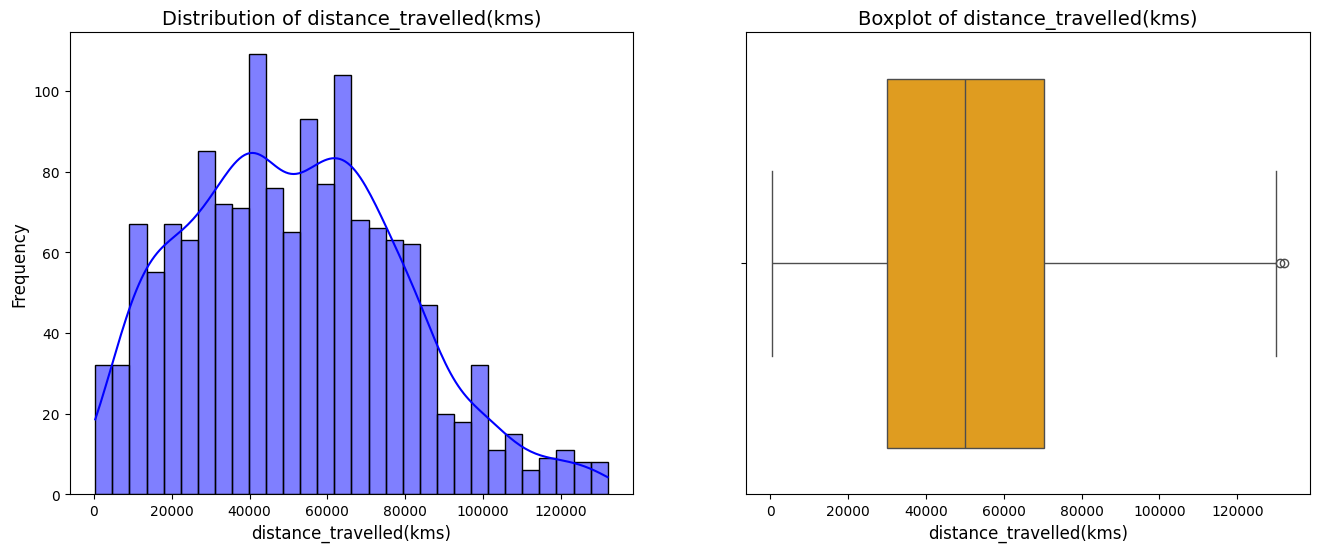

distance_travelled(kms) Summary:
 count      1512.000000
mean      51565.469577
std       27765.866167
min         350.000000
25%       30075.000000
50%       50000.000000
75%       70256.000000
max      132000.000000
Name: distance_travelled(kms), dtype: float64


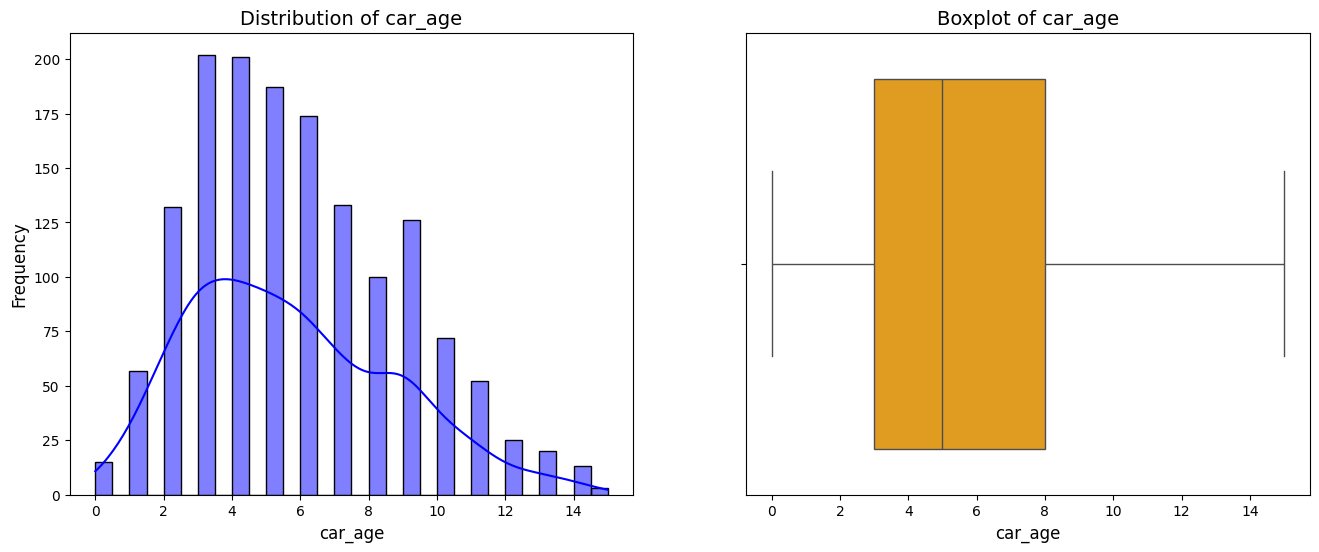

car_age Summary:
 count    1512.000000
mean        5.723545
std         3.026952
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        15.000000
Name: car_age, dtype: float64


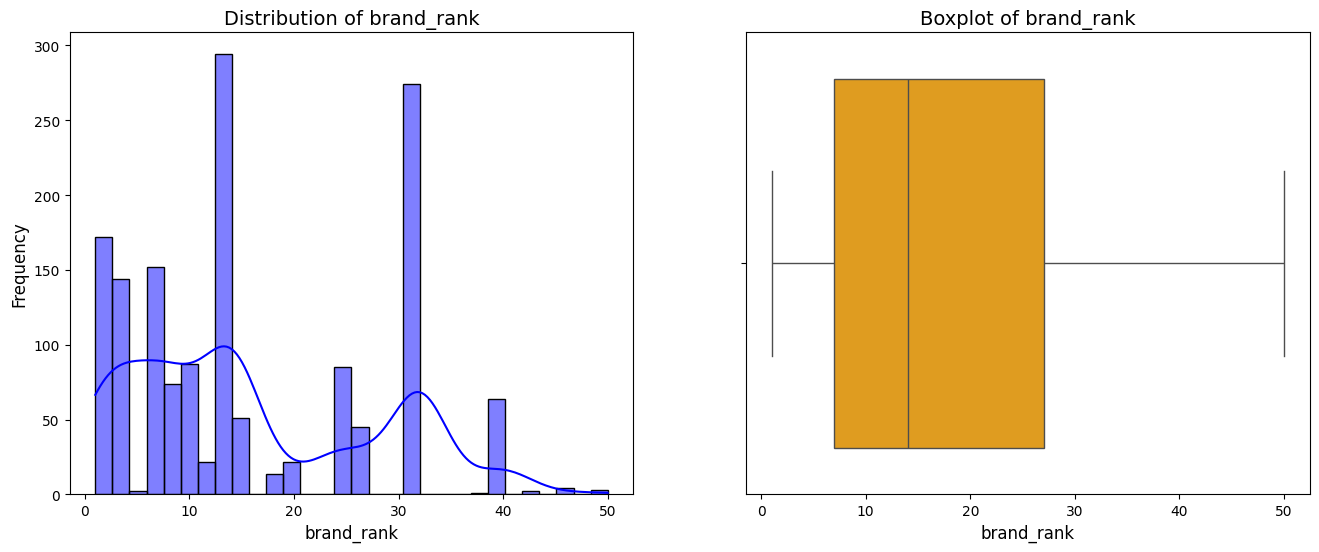

brand_rank Summary:
 count    1512.000000
mean       15.969577
std        11.728977
min         1.000000
25%         7.000000
50%        14.000000
75%        27.000000
max        50.000000
Name: brand_rank, dtype: float64

Data shape after outlier removal: (1512, 11)


Id  year    brand                         full_model_name model_name  \
0   0  2016    Honda                         Honda Brio S MT       Brio   
1   1  2012   Nissan                  Nissan Sunny XV Diesel      Sunny   
2   2  2017   Toyota  Toyota Fortuner 2.8 4x2 MT [2016-2020]   Fortuner   
4   4  2012  Hyundai       Hyundai Verna Fluidic 1.6 CRDi SX      Verna   
5   5  2012  Hyundai            Hyundai i20 Sportz 1.2 BS-IV        i20   

       price  distance_travelled(kms) fuel_type    city  brand_rank  car_age  
0   425000.0                   9680.0    Petrol  Mumbai           7      5.0  
1   325000.0                 119120.0    Diesel  Mumbai          11      9.0  
2  2650000.0                  64593.0    Diesel   Thane           1      4.0  
4   475000.0                  23800.0    Diesel  Mumbai          14      9.0  
5   335000.0                  45000.0    Petrol  Mumbai          14      9.0

In [2]:
# Univariate Analysis with Outlier Identification and Removal

# Numerical columns for analysis
numerical_columns = ['price', 'distance_travelled(kms)', 'car_age', 'brand_rank']


# Outlier removal based on IQR
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Remove outliers for numerical columns
for col in numerical_columns:
    data = remove_outliers(data, col)


# Setting up plots
for col in numerical_columns:
    plt.figure(figsize=(16, 6))

    # Histogram with KDE for distribution
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Boxplot for outlier detection
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col], color='orange')
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)

    plt.show()
    print(f"{col} Summary:\n", data[col].describe())


# Display updated dataset information
print("\nData shape after outlier removal:", data.shape)
data.head()


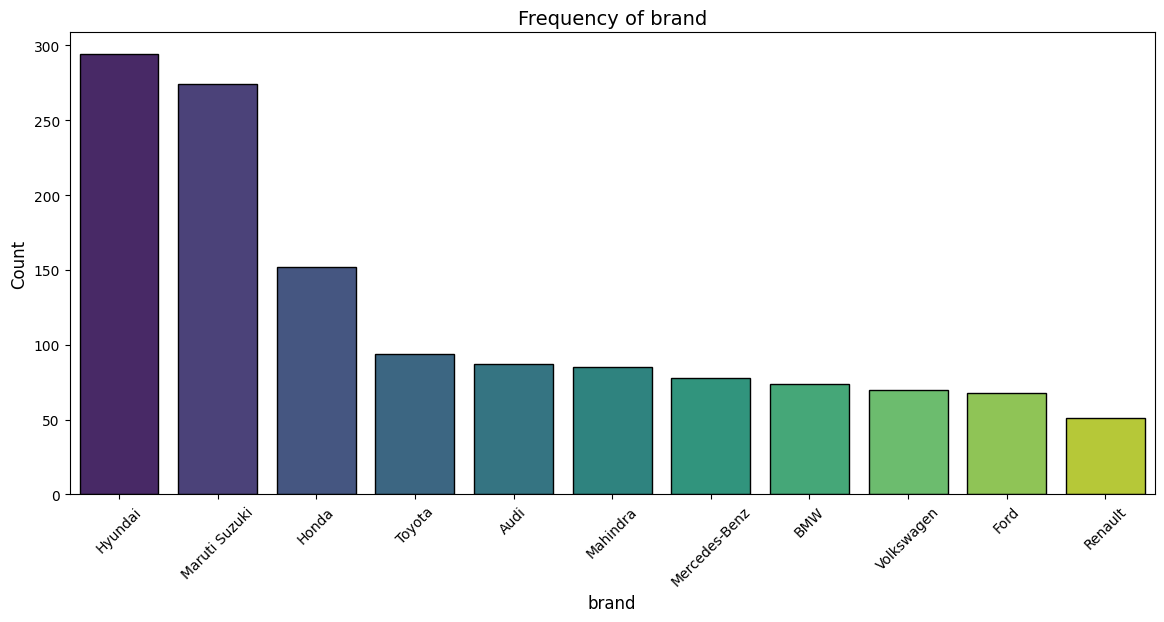

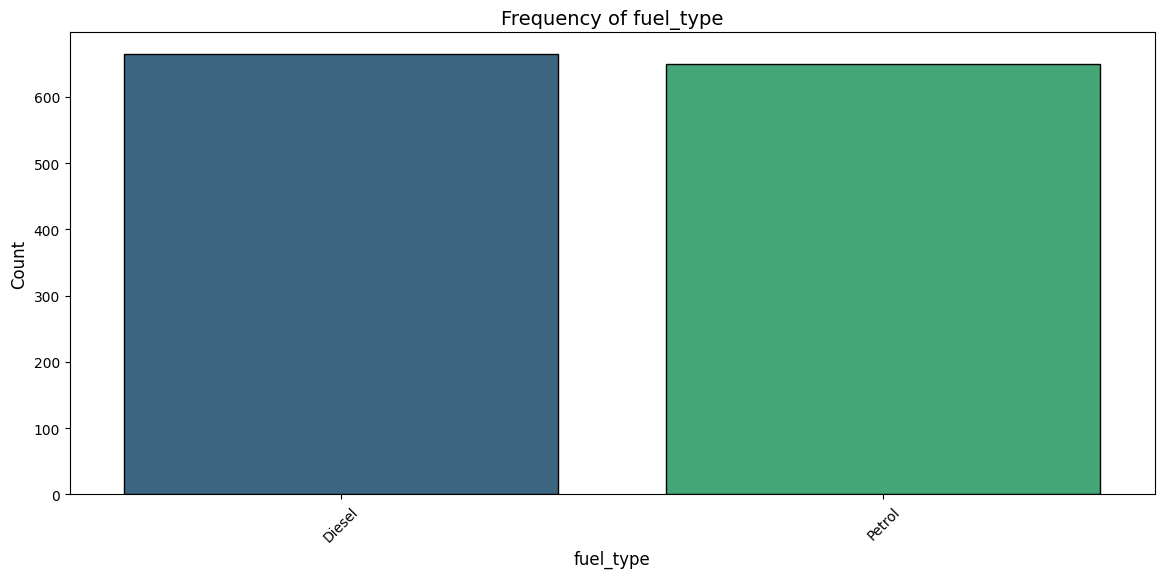

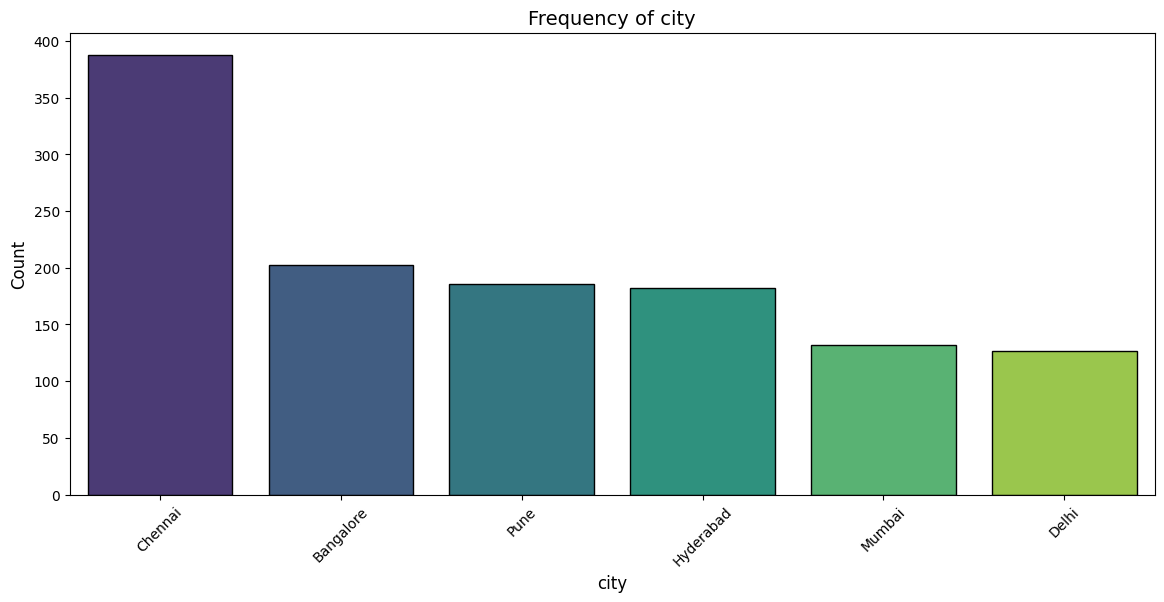


Data shape after removing rare categories: (1217, 11)


Id  year    brand                                    full_model_name  \
0   0  2016    Honda                                    Honda Brio S MT   
4   4  2012  Hyundai                  Hyundai Verna Fluidic 1.6 CRDi SX   
5   5  2012  Hyundai                       Hyundai i20 Sportz 1.2 BS-IV   
6   6  2019   Toyota                                    Toyota Glanza V   
8   8  2017  Hyundai  Hyundai Grand i10 Sportz (O) AT 1.2 Kappa VTVT...   

  model_name     price  distance_travelled(kms) fuel_type    city  brand_rank  \
0       Brio  425000.0                   9680.0    Petrol  Mumbai           7   
4      Verna  475000.0                  23800.0    Diesel  Mumbai          14   
5        i20  335000.0                  45000.0    Petrol  Mumbai          14   
6     Glanza  750000.0                  19500.0    Petrol  Mumbai           1   
8      Grand  565000.0                  44329.0    Petrol  Mumbai          14   

   car_age  
0      5.0  
4      9.0  
5      9.0  
6      2.0  
8      4.0

In [3]:
# Categorical variables for analysis
categorical_columns = ['brand', 'fuel_type', 'city']

# Bar plots for categorical variables with filtering
for col in categorical_columns:
    plt.figure(figsize=(14, 6))

    # Original bar plot
    value_counts = data[col].value_counts()

    # Filter categories with fewer than 50 samples
    rare_categories = value_counts[value_counts < 50].index
    data = data[~data[col].isin(rare_categories)]
    value_counts = data[col].value_counts()
    
    sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis", edgecolor='black')
    plt.title(f'Frequency of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()


# Display updated dataset information
print("\nData shape after removing rare categories:", data.shape)
data.head()


corr_matrix:                              price  distance_travelled(kms)   car_age  \
price                    1.000000                -0.106315 -0.284613   
distance_travelled(kms) -0.106315                 1.000000  0.545419   
car_age                 -0.284613                 0.545419  1.000000   
brand_rank              -0.396696                -0.112992 -0.142544   

                         brand_rank  
price                     -0.396696  
distance_travelled(kms)   -0.112992  
car_age                   -0.142544  
brand_rank                 1.000000  


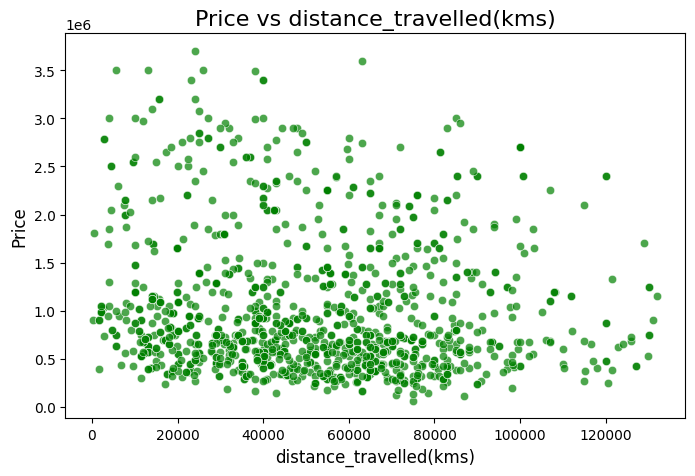

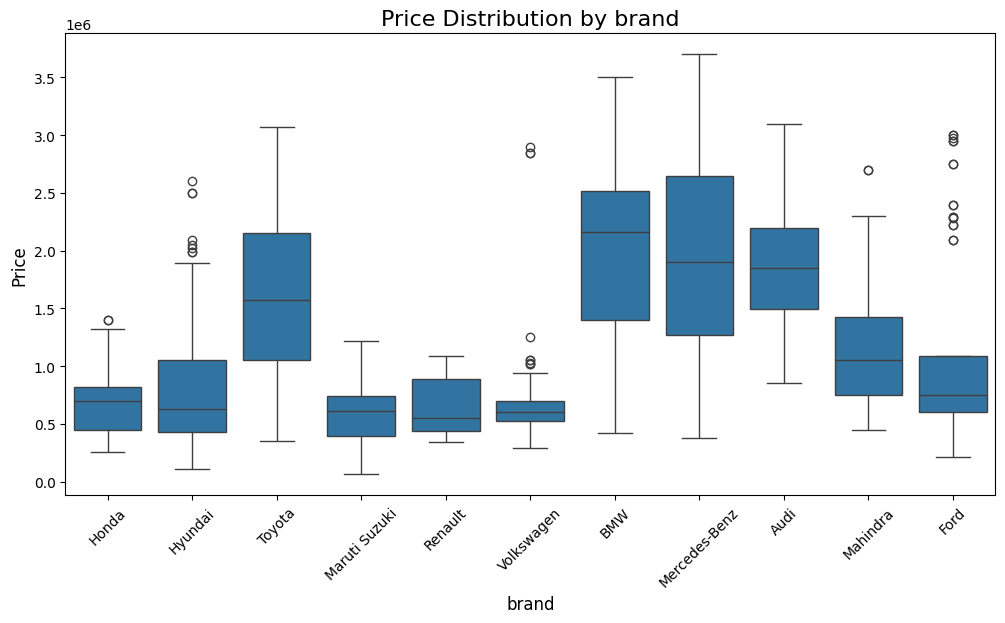

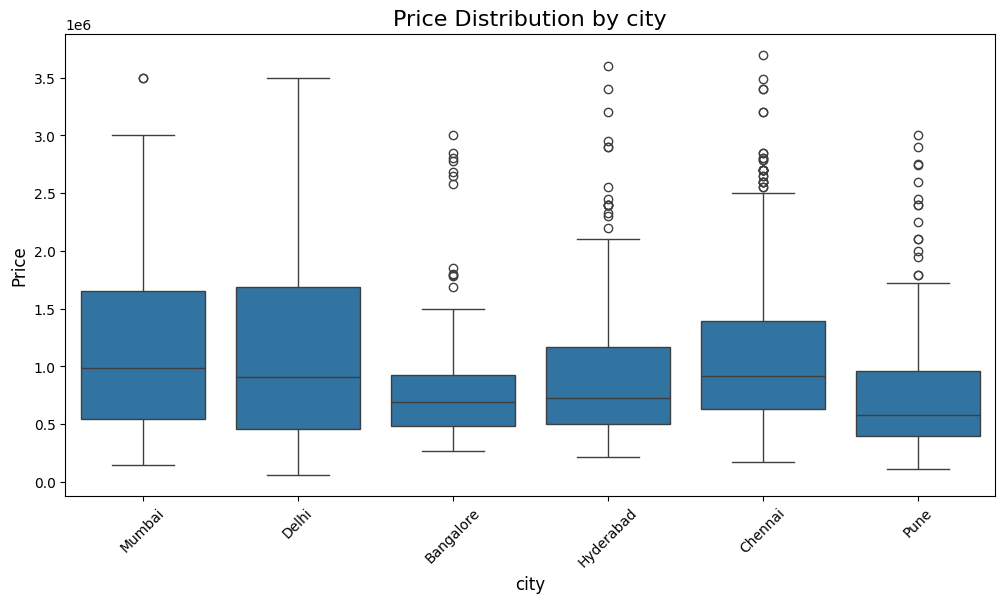

In [4]:
# Multivariate Analysis: Correlation matrix for numerical features
plt.figure(figsize=(8, 6))
corr_matrix = data[['price', 'distance_travelled(kms)', 'car_age', 'brand_rank']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix', fontsize=16)
plt.show()
print('corr_matrix: ', corr_matrix)

# Scatter plots to analyze relationships with `price`
numerical_columns = ['distance_travelled(kms)', 'car_age', 'brand_rank']
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=data[col], y=data['price'], alpha=0.7, color='green')
    plt.title(f'Price vs {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.show()

# Box plots for categorical features vs `price`
categorical_columns = ['brand', 'fuel_type', 'city']
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=data[col], y=data['price'])
    plt.title(f'Price Distribution by {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()


In [5]:
# Step 3: Data Preprocessing to prepare the data for modeling. This includes:
# Encoding categorical features.
# Scaling numerical features.
# Splitting the data into training and testing sets.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define features and target variable
X = data.drop(columns=['Id', 'price', 'full_model_name', 'year']) # year is redundant with car_age
y = data['price']

# Identify categorical and numerical features
categorical_features = ['brand', 'fuel_type', 'city', 'model_name']
numerical_features = ['distance_travelled(kms)', 'car_age', 'brand_rank']

# Define preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing to the training and test data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Display the preprocessed training data shape as confirmation
X_train_preprocessed.shape, X_test_preprocessed.shape

# The training dataset has 1380 samples with 216 features after encoding and scaling.
# The test dataset has 345 samples with the same number of features.


((973, 117), (244, 117))

In [6]:
# Feature Preprocessing & Importance using RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
# Fit a RandomForestRegressor for feature importance extraction
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_preprocessed, y_train)

# Extract feature importances
if hasattr(rf_model, "feature_importances_"):
    # Combine numerical and categorical feature names
    feature_names = (
        numerical_features +
        list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
    )
    feature_importances = rf_model.feature_importances_

    # Create a DataFrame for feature importance
    importance_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": feature_importances
    }).sort_values(by="Importance", ascending=False)

# Display the top 10 important features
importance_df.head(10)

Feature  Importance
2                brand_rank    0.164172
1                   car_age    0.158014
14         fuel_type_Diesel    0.110071
0   distance_travelled(kms)    0.096950
15         fuel_type_Petrol    0.083231
6               brand_Honda    0.041363
13         brand_Volkswagen    0.041217
57      model_name_EcoSport    0.034651
3                brand_Audi    0.026668
52         model_name_Creta    0.022732

In [7]:
# Step 4: Model Development
# Objective: Train multiple regression models and evaluate their performance.
# Actions:
# Train different regression models:
# Linear Regression
# Ridge and Lasso Regression
# Decision Trees
# Random Forest
# Evaluate models using metrics like RMSE, MAE, and R² on the hold-out/test dataset.

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Define metrics for evaluation
def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scorers = {
    "RMSE": make_scorer(rmse_scorer, greater_is_better=False),
    "MAE": make_scorer(mean_absolute_error, greater_is_better=False),
    "R^2 Score": make_scorer(r2_score),
}

# Perform Grid Search for Random Forest Regressor
def grid_search_random_forest(X, y):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    grid_search = GridSearchCV(
        RandomForestRegressor(random_state=42),
        param_grid,
        cv=5,
        scoring='neg_mean_squared_error',  # Use a standard scoring metric
        verbose=1,
        n_jobs=-1
    )

    grid_search.fit(X, y)
    return grid_search.best_params_, grid_search.best_estimator_

# Dictionary to store model performances
model_performance = {}

# Train, cross-validate, and evaluate models
for name, model in models.items():
    if name == "Random Forest Regressor":
        # Perform grid search for Random Forest
        best_params, best_model = grid_search_random_forest(X_train_preprocessed, y_train)
        print(f"Best Parameters for {name}: {best_params}")
        model = best_model

    # Cross-validate predictions
    scores = {
        "RMSE": -cross_val_score(model, X_train_preprocessed, y_train, cv=5, scoring=scorers["RMSE"]).mean(),
        "MAE": -cross_val_score(model, X_train_preprocessed, y_train, cv=5, scoring=scorers["MAE"]).mean(),
        "R^2 Score": cross_val_score(model, X_train_preprocessed, y_train, cv=5, scoring=scorers["R^2 Score"]).mean()
    }

    # Store the results
    model_performance[name] = scores

# Metrics Explanation
metrics_explanation = {
    "RMSE": "Root Mean Squared Error: Indicates the average deviation of predictions from actual values. Lower is better.",
    "MAE": "Mean Absolute Error: Average of absolute differences between predictions and actual values. Lower is better.",
    "R^2 Score": "R-squared: Proportion of variance explained by the model. Higher is better, with 1 being perfect."
}

# Display model performances
performance_df = pd.DataFrame(model_performance).T
print("Metrics Explanation:")
for metric, explanation in metrics_explanation.items():
    print(f"{metric}: {explanation}")

print("\nModel Performance Comparison:")
print(performance_df)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Random Forest Regressor: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Metrics Explanation:
RMSE: Root Mean Squared Error: Indicates the average deviation of predictions from actual values. Lower is better.
MAE: Mean Absolute Error: Average of absolute differences between predictions and actual values. Lower is better.
R^2 Score: R-squared: Proportion of variance explained by the model. Higher is better, with 1 being perfect.

Model Performance Comparison:
                                  RMSE            MAE  R^2 Score
Linear Regression        280795.122572  191207.629222   0.838544
Ridge Regression         282521.597896  195605.343545   0.837966
Lasso Regression         283412.194068  192116.075435   0.835459
Random Forest Regressor  253218.821363  140819.507910   0.869988


In [8]:
# Evaluate the best model (Random Forest) on the test dataset
best_model.fit(X_train_preprocessed, y_train)
y_test_pred = best_model.predict(X_test_preprocessed)

# Compute metrics on the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display test set performance
print("\nTest Set Performance:")
print(f"RMSE: {test_rmse:.2f}")
print(f"MAE: {test_mae:.2f}")
print(f"R^2 Score: {test_r2:.4f}")


Test Set Performance:
RMSE: 220490.98
MAE: 120691.58
R^2 Score: 0.9060
